# Visualize the fitted 2D Gaussian with an ellipse drawn on the image and a marker 'x' at the center.
# Put the individual galaxies in a loop.

In [1]:
from astropy.modeling.functional_models import Gaussian2D
from astropy.modeling import fitting
import sys
sys.path.append('/home/jovyan/sharenb/linux_compile')
from pyBBarolo import FitMod3D, GalMod, version
import numpy as np
from astropy.table import Table, join
from astropy.io import fits
from astropy.io.fits import getheader
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import os.path

In [2]:
listfile_fitctr = 'gallist_fitctr.txt'
# Get the list of galaxies to work on
with open(listfile_fitctr) as f:
    namelist_fitctr = f.read().splitlines()
gallist_fitctr = [gal for gal in namelist_fitctr]
print (namelist_fitctr)

['IC0480', 'IC1683', 'NGC0523', 'NGC4149', 'NGC6361', 'UGC09665', 'UGC10123', 'IC2247', 'IC2487', 'NGC0447', 'NGC2347', 'NGC5657', 'NGC6394', 'UGC05598']


In [3]:
datadir = '/home/jovyan/carmaedge/'
basedir = datadir+'edge-sql-base/'
db = Table.read(basedir+'global_values/external/edge_ned.csv', format='ascii.ecsv')
print(db.keys())

['Name', 'nedRA', 'nedDE', 'nedVopt']


In [4]:
def fit_2dgaussian(array,xme,yme,xsidelen=None,ysidelen=None,theta=0,gal=None):
    #sidelen is the sidelength of the square whose center is at array[yme][xme], 
    
    y, x = np.indices(array.shape)
    if xsidelen==None and ysidelen==None:
        y_fit = y
        x_fit = x
        z_fit = array.copy()
        xlower=0
        ylower=0
    else:
        if xsidelen == None:
            xsidelen = len(array[0])
        if ysidelen == None:
            ysidelen = len(array)
        x_fit=np.zeros([ysidelen,xsidelen])
        y_fit=np.zeros([ysidelen,xsidelen])
        z_fit=np.zeros([ysidelen,xsidelen])
        ylower=int(round(yme)-ysidelen//2)
        yupper=int(round(yme)+ysidelen-ysidelen//2)
        xlower=int(round(xme)-xsidelen//2)
        xupper=int(round(xme)+xsidelen-xsidelen//2)
        if gal == 'NGC2347':
            ylower+=7
            yupper+=7
            xlower-=5
            xupper-=5
        for j in range(ylower,yupper):
            for i in range(xlower,xupper):
                x_fit[j-ylower][i-xlower]=x[j][i]
                y_fit[j-ylower][i-xlower]=y[j][i]
                z_fit[j-ylower][i-xlower]=array[j][i]
        #print (z_fit)

    if not array.ndim == 2:
        raise TypeError('Input array is not a frame or 2d array')        
 
    # Creating the 2D Gaussian model
    print ('maximum at',np.nanmax(z_fit))
#    print ('xme =',xme,'yme =',yme)
    init = Gaussian2D(amplitude=np.nanmax(z_fit), x_mean=xme, 
                              y_mean=yme,x_stddev=7,y_stddev=7,theta=0)
    
    # Levenberg-Marquardt algorithm
    fitter = fitting.LevMarLSQFitter()                  
    
    fit = fitter(init, x_fit, y_fit, z_fit)
    return fit, z_fit, ylower, xlower  

In [5]:
data_test=np.zeros([20,20])

Amplitude = 100
xmean=10
ymean=10
xsigma=5
ysigma=5
for x in range(20):
    for y in range(20):
        data_test[y][x] = Amplitude*np.exp(-( (x-xmean)**2 / ( 2.0 * xsigma**2 )+
                                             (y-ymean)**2 / ( 2.0 * ysigma**2 ) ) 
                                          )+10*np.random.uniform(low=-2,high=2)
#print (data_test)

test_fitted=fit_2dgaussian(data_test,10,10,xsidelen=5, ysidelen=10)[0]
print (test_fitted)

maximum at 110.109482468
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
      amplitude       x_mean        y_mean    ...    y_stddev        theta     
    ------------- ------------- ------------- ... ------------- ---------------
    99.4103962692 10.2295804333 9.97034510926 ... 5.19156405376 0.0400610749345


 NED  pixel (0-based) is 50.1500 57.9880
maximum at 85.9439086914
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
     amplitude       x_mean       y_mean      x_stddev     y_stddev       theta     
    ------------ ------------- ------------ ----------- ------------- --------------
    82.199684712 49.4545778599 55.289647792 2.020596434 6.15178966506 -0.17222534929
gal_name ractr_ned dcctr_ned  ractr_fit     dcctr_fit  
-------- --------- --------- ------------ -------------
  IC0480 118.84662  26.74333 118.84683632 26.7425804577
 NED  pixel (0-based) is 48.7629 49.3840
maximum at 170.702056885
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
      amplitude       x_mean        y_mean    ...    y_stddev        theta     
    ------------- ------------- ------------- ... ------------- ---------------
    162.290592228 49.8969780735 50.0321019402 ... 2.42082350557 -0.239655659253
gal_name ractr_ned dcctr_ned   ractr_fi

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


gal_name ractr_ned dcctr_ned   ractr_fit     dcctr_fit  
-------- --------- --------- ------------- -------------
 NGC2347 109.01537  64.70892 109.017375457 64.7109797287
 NED  pixel (0-based) is 49.9895 49.9880
maximum at 62.4108123779
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
     amplitude       x_mean        y_mean    ...   y_stddev        theta     
    ------------ ------------- ------------- ... ------------ ---------------
    62.442003966 48.9842594215 50.1051691093 ... 2.2261009803 -0.103221341057
gal_name ractr_ned dcctr_ned   ractr_fit     dcctr_fit  
-------- --------- --------- ------------- -------------
 NGC5657 217.68167  29.18083 217.681989832 29.1808625466
 NED  pixel (0-based) is 50.8484 50.0040
maximum at 21.2245178223
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
      amplitude      x_mean        y_mean    ...   y_stddev       theta    
    ------------- ------------ ------------- ... -

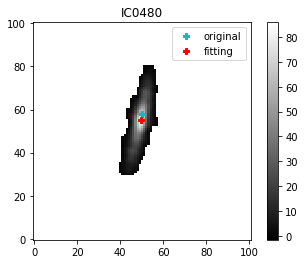

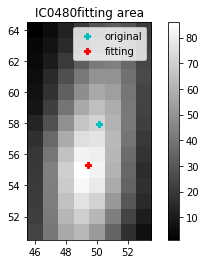

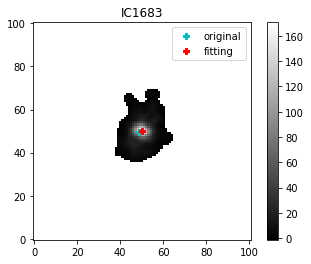

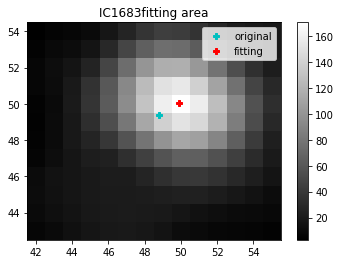

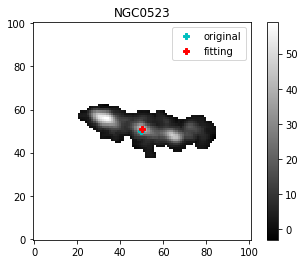

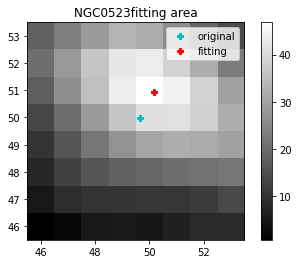

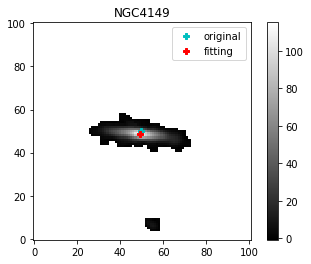

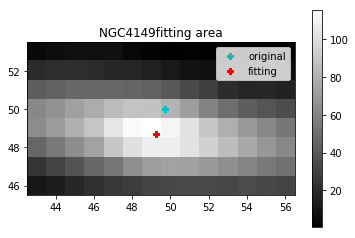

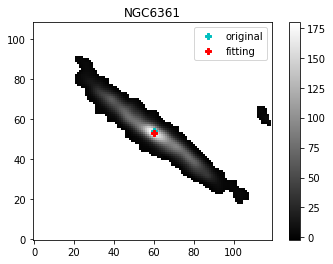

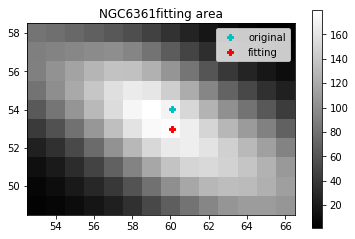

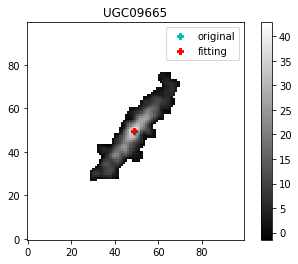

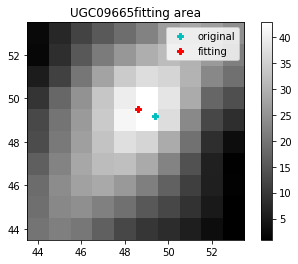

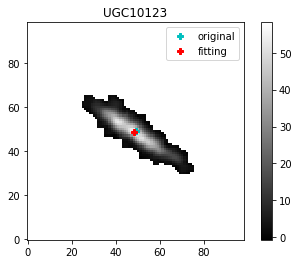

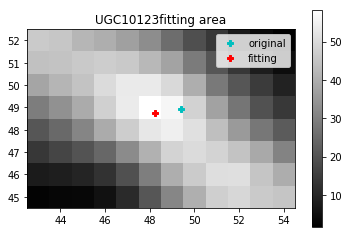

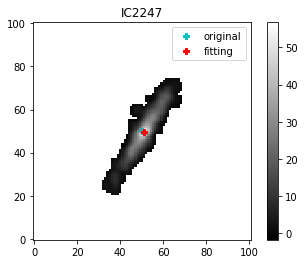

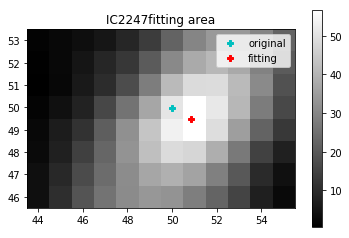

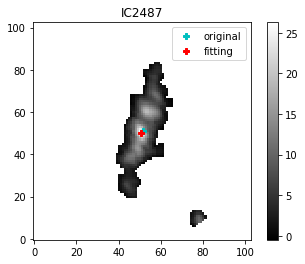

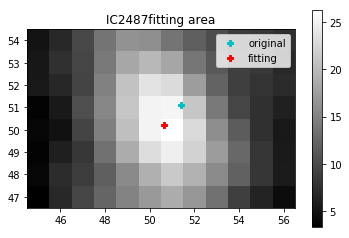

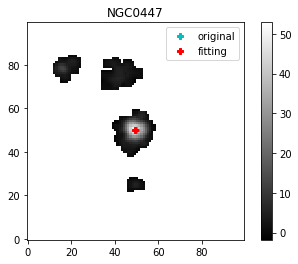

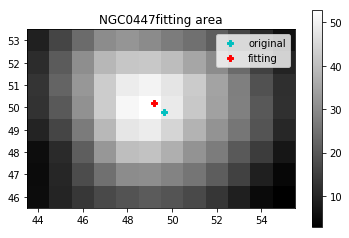

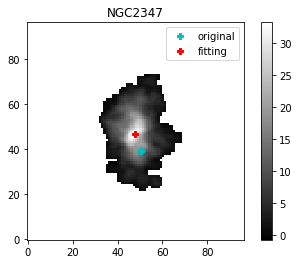

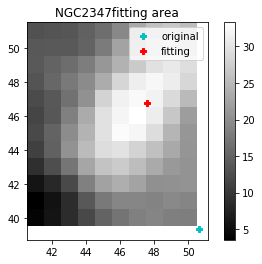

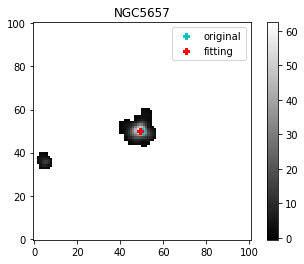

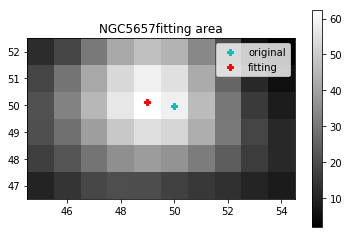

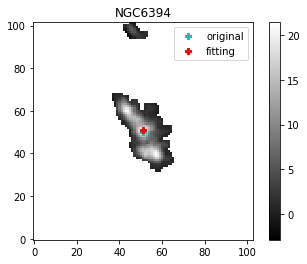

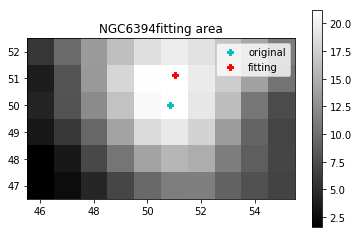

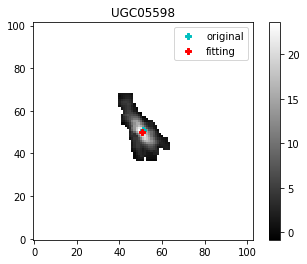

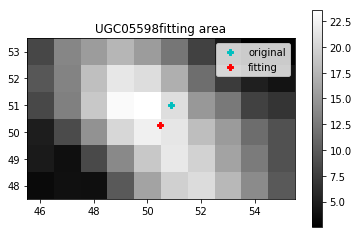

In [6]:
for gal in gallist_fitctr:
    fitsin ='/home/jovyan/carmaedge/comb_de_10/native/mom/'+gal+'.co.de10_dil.mom0.fits'
    hdr = getheader(fitsin)
    i = np.where(db['Name'] == gal)[0][0]
    w = WCS(hdr)
    ractr = db['nedRA'][i]
    dcctr = db['nedDE'][i]
    nedpx = w.wcs_world2pix([[ractr,dcctr]],0)
    print(' NED  pixel (0-based) is {:.4f} {:.4f}'.format(nedpx[0][0],nedpx[0][1]))
    xme=nedpx[0][0]
    yme=nedpx[0][1]
       
    gal_fits = fits.open(fitsin)
    gal_data = gal_fits['PRIMARY'].data
#    print (np.nanmean(gal_data))
#    print (gal_data[int(yme)][int(xme)])

    if gal == 'IC0480':
        xside = 8
        yside = 14
    elif gal == 'IC1683':
        xside = 14
        yside = 12
    elif gal == 'NGC0523':
        xside = 8
        yside = 8
    elif gal == 'NGC4149':
        xside = 14
        yside = 8
    elif gal == 'NGC6361':
        xside = 14
        yside = 10
    elif gal == 'UGC09665':
        xside = 10
        yside = 10
    elif gal == 'UGC10123':
        xside = 12
        yside = 8
    elif gal == 'NGC2347':
        xside = 10
        yside = 12
    elif gal == 'NGC5657':
        xside = 10
        yside = 6
    param_fitted, z_fit, ylower,xlower = fit_2dgaussian(
        gal_data, xme,yme, xsidelen=xside, ysidelen=yside, gal=gal)
     
    print (param_fitted)
    
    xme_new=param_fitted.x_mean.value
    yme_new=param_fitted.y_mean.value
    fitdegree=w.wcs_pix2world([[xme_new,yme_new]], 0)
    
    plt.figure()
    plt.title(gal)
    plt.imshow(gal_data, cmap='gray', origin='lower')
    plt.plot(xme,yme,'cP', label = 'original')
    plt.plot(xme_new,yme_new,'rP', label = 'fitting')
    plt.legend()
    plt.colorbar()

    plt.figure()
    plt.title(gal+'fitting area')
    plt.imshow(z_fit, cmap='gray', origin='lower',extent=(-0.5+xlower,-0.5+xlower+len(z_fit[0]),-0.5+ylower,-0.5+ylower+len(z_fit)))
    plt.plot(xme,yme,'cP', label = 'original')
    plt.plot(xme_new,yme_new,'rP', label = 'fitting')
    plt.legend()
    plt.colorbar()
    
    t=Table()
    t['gal_name'] = [gal]
    t['ractr_ned'] = [ractr]
    t['dcctr_ned'] = [dcctr]
    t['ractr_fit'] = [fitdegree[0][0]]
    t['dcctr_fit'] = [fitdegree[0][1]]
    print (t)
    t.write('fitctr/'+gal+'_fitctr.txt',overwrite=True,format='ascii.csv')